# TP  - Modèles ensemblistes

### Objectif

Ce TP a pour but de mettre en pratique les compétences théoriques vues en cours sur les méthodes ensemblistes à base d'arbres de décision. 

On s'appuiera sur le jeu de données (simple) *breast-cancer* mis à disposition par l'API *Scikit-Learn*, et on se donnera pour but de classifier les tumeurs des patients atteints d'un cancer du sein suivant leur type (maligne vs bénigne).

### Import des biblitohèques utiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,\
                            classification_report, precision_recall_curve, average_precision_score
from sklearn.utils.multiclass import unique_labels
from inspect import signature

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive
from tabulate import tabulate

np.set_printoptions(precision=2)
np.random.seed(160716)
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
#conda install -c conda-forge ipywidgets

In [6]:
#conda install -c conda-forge tabulate

### Chargement des données : classification de tumeurs mamaires

In [4]:
data = load_breast_cancer()

Le champ _target_ indique si la tumeur est maligne (_target_ = 0) ou bénigne (_target_ = 1).

### Préparation des données

La cible (*ie* la valeur à prédire) est le champ *target*, que l'on stocke dans la sortie *y* du modèle. Les autres champs consitueront les *features* (*ie* les prédicteurs) du modèle ; on les stocke dans *X*.

On sépare le dataset en un *train set* et un *test set* (80% / 20%).

### Question 1:
Séparer les targets et les features. Effetuer la séparation train/test. Une fois ceci effectué, normaliser les variables.

In [5]:
X = data.data
y = data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

On normalise les variables.

In [7]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

### Arbre de décision

La fonction ci-dessous permet d'afficher la matrice de confusion en fonction de la prédiction d'un modèle.

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
  
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#### Les hyperparamètres d'un arbre de décision

Description de la fonction *DecisionTreeClassifier* de *Scikit-Learn*.

In [ ]:
help(DecisionTreeClassifier)

### Question 2:

Quels sont les paramètres qui ont été abordés en cours ? À quoi servent ceux qui ne l'ont pas été, que peuvent-ils apporter et comment interagissent-ils avec les premiers ?

La fonction ci-dessous a pour but de construire un arbre de décision sous la contrainte des paramètres exposés en cours. Les *widgets* permettent d'influer sur le résultat de la fonction et constater l'influence desdits paramètres sur l'arbre construit.

### Question 3:

Completer la fonction suivante avec les étapes manquantes.

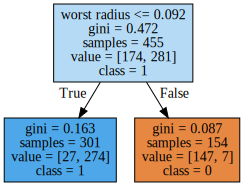

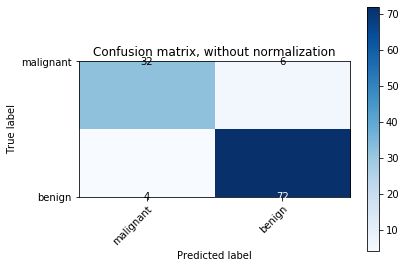

In [11]:
def plot_tree(criterion, splitter, max_depth, min_samples_split, min_samples_leaf=0.2):
    decision_tree_classifier = DecisionTreeClassifier(criterion=criterion,
                                                      splitter=splitter,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      min_weight_fraction_leaf=0.0,
                                                      max_features=None,
                                                      random_state=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=0.0,
                                                      class_weight=None,
                                                      presort=False)
    
    decision_tree_classifier.fit(X_train, y_train)
    
    graph = Source(export_graphviz(decision_tree_classifier, 
                                   out_file=None,
                                   feature_names=data.feature_names,
                                   class_names=['0', '1'],
                                   filled = True))
    
    display(SVG(graph.pipe(format='svg')))
    
    y_pred = decision_tree_classifier.predict(X_test)
    
    plot_confusion_matrix(y_test, y_pred, classes=data.target_names)
    
    return decision_tree_classifier

inter = interactive(plot_tree,
                    criterion=["gini", "entropy"],
                    splitter=["best", "random"],
                    max_depth=range(1,11),
                    min_samples_split=(0.1,1),
                    min_samples_leaf=(0.1,0.5))
display(inter)

NB - Jauger manuellement la valeur des différents paramètres d'un modèle aboutissant à sa performance optimale n'est pas chose aisée. Nous aborderons lors d'un prochain TP diverses approches permettant la sélection automatique des hyperparamètres (GridSearch, RandomSearch, ...).

### Random Forest

On introduit à présent la fonction *RandomForestClassifier* de *Scikit-Learn*. 

#### Les hyperparamètres d'une foret aléatoire d'arbres de décision

In [ ]:
help(RandomForestClassifier)

### Question 4:

De manière analogue au précédent arbre de décision, construire un classificateur se fondant sur une forêt aléatoire. Entraîner ce classificateur sur notre *train set* et l'utiliser pour prédire les classes des entrées du *test set*.

In [13]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, 
                                                  criterion='gini', 
                                                  max_depth=None, 
                                                  min_samples_split=2, 
                                                  min_samples_leaf=1, 
                                                  min_weight_fraction_leaf=0.0, 
                                                  max_features='auto', 
                                                  max_leaf_nodes=None, 
                                                  min_impurity_decrease=0.0, 
                                                  min_impurity_split=None, 
                                                  bootstrap=True, 
                                                  oob_score=False, 
                                                  n_jobs=None, 
                                                  random_state=None, 
                                                  verbose=0, 
                                                  warm_start=False, 
                                                  class_weight=None)

In [14]:
random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

#### Analyse de la performance

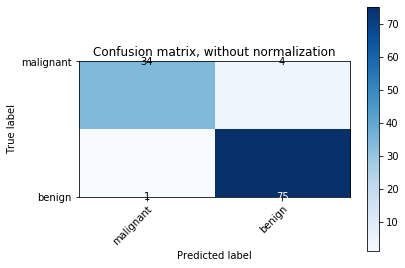

In [15]:
plot_confusion_matrix(y_test, y_pred, classes=data.target_names)

In [16]:
print("Le Random Forest a pour 'accuracy' : %.3f." % accuracy_score(y_test, y_pred))

Le Random Forest a pour 'accuracy' : 0.956.


### Question 5:

Commenter les résultats.

## Courbe de précision-rappel

Comme au cours d'un des TPs précédents, on utilise une courbe de précision rappel pour évaluer le modèle.

### Question 6:

Utiliser la méthode *predict_proba* de la classe (au sens de Python) *RandomForestClassifier* pour calculer la probabilité d'appartenance à chaque classe (au sens d'un problème de classification) des tumeurs du *test set*.

In [17]:
y_score = random_forest_classifier.predict_proba(X_test)

### Question 7:

Tracer la courbe de précision-rappel.

In [18]:
precision, recall, _ = precision_recall_curve(y_test, y_score[:, 1])

Text(0.5, 1.0, 'Courbe de Précision-Rappel pour la classification des tumeurs mamaires')

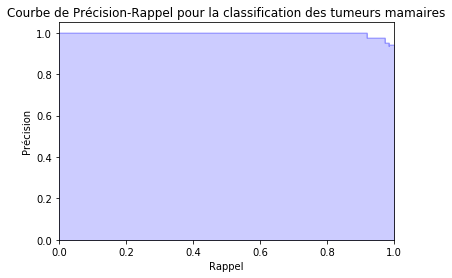

In [19]:
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Courbe de Précision-Rappel pour la classification des tumeurs mamaires')

### Question 8:
Un indicateur de performance pertinent à calculer est **l'aire sous la courbe de Précision-Rappel**. Utiliser la fonction *average_precision_score* de *sklearn.metrics* pour la dériver.

In [20]:
average_precision = average_precision_score(y_test, y_score[:, 1])

print('Average precision-recall score: {0:0.3f}'.format(average_precision))

Average precision-recall score: 0.997


#### Feature importance

En utilisant l'attribut approprié de la classe *RandomForestClassifier*, produire l'importance des variables pour le modèle de forêt aléatoire.

In [21]:
headers = ["name", "score"]
values = sorted(zip(pd.DataFrame(X_train), random_forest_classifier.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

  name       score
    22  0.1296
     7  0.1161
    23  0.114236
    20  0.109096
    27  0.0891011
     2  0.0619577
     6  0.0550243
    13  0.0485927
     3  0.0432834
     0  0.039872
    26  0.027961
    12  0.0250616
    24  0.0164996
    25  0.0153367
    21  0.0152461
     1  0.012809
    29  0.0112746
     5  0.00953767
    28  0.00782582
    10  0.00720672
     4  0.00696075
    19  0.00592754
    15  0.00526971
    16  0.00490328
    18  0.00424055
    11  0.00417298
     8  0.00392287
    14  0.00340578
     9  0.00285136
    17  0.00272393


### Question 9:

Ces résultats concordent-ils avec ceux d'une analyse exploratoire des corrélations entre les features et la cible ?

Certaines features qui étaient corrélées avec la variable cible sont retrouvées dans la feature importance données par la RandomForest. Des features relativement non corrélées apparaissent comme importantes pour le modèle : il s'agit ici de corrélations multi-variées qui ne sont donc pas facilement repérables en amont.

### Gradient Boosting

On introduit ici le Gradient Boosting implémenté dans *Scikit-Learn*.

In [ ]:
help(GradientBoostingClassifier)

#### Construction des arbres

### Question 10:

En s'inspirant de la fonction **plot_tree**, construire une fonction **plot_gbm** qui prend en argument *loss*, *learning_rate*, *n_estimators*, *subsample*, *criterion*, *min_samples_split*, *min_samples_leaf* et *max_depth*, et retourne les cinq premiers arbres issus de l'entraînement d'un classificateur à Gradient Boosting, ainsi que la matrice de confusion des prédictions associées.

Les valeurs des paramètres seront par exemple :
 - loss='deviance' ou loss='exponential'
 - learning_rate entre 0.1 et 1
 - n_estimators entre 1 et 20
 - subsample entre 0.1 et 1
 - criterion='friedman_mse' ou criterion='mse' ou criterion='mae'
 - min_samples_split entre 0.1 et 1
 - min_samples_leaf entre 0.1 et 0.5
 - max_depth entre 1 et 10

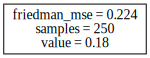

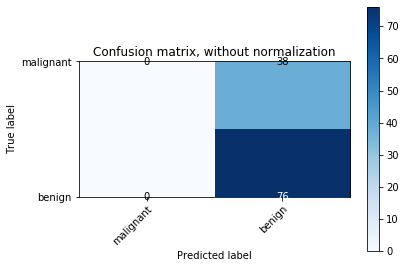

In [23]:
def plot_gbm(loss, learning_rate, n_estimators, subsample, criterion, min_samples_split, min_samples_leaf, max_depth):
    gradient_boosting_classifier = GradientBoostingClassifier(loss=loss, 
                                                              learning_rate=learning_rate, 
                                                              n_estimators=n_estimators, 
                                                              subsample=subsample, 
                                                              criterion=criterion, 
                                                              min_samples_split=min_samples_split, 
                                                              min_samples_leaf=min_samples_leaf, 
                                                              min_weight_fraction_leaf=0.0, 
                                                              max_depth=max_depth, 
                                                              min_impurity_decrease=0.0, 
                                                              min_impurity_split=None, 
                                                              init=None, 
                                                              random_state=None, 
                                                              max_features=None, 
                                                              verbose=0, 
                                                              max_leaf_nodes=None, 
                                                              warm_start=False, 
                                                              presort='auto', 
                                                              validation_fraction=0.1, 
                                                              n_iter_no_change=None, 
                                                              tol=0.0001)
    
    gradient_boosting_classifier.fit(X_train, y_train)
    
    for tree in range(min(n_estimators, 4)):
        graph = Source(export_graphviz(gradient_boosting_classifier.estimators_[tree, 0], 
                                       out_file=None,
                                       feature_names=data.feature_names,
                                       class_names=['0', '1'],
                                       filled = True))
        
        display(SVG(graph.pipe(format='svg')))
    
    y_pred = gradient_boosting_classifier.predict(X_test)
    
    plot_confusion_matrix(y_test, y_pred, classes=data.target_names)
    
    return gradient_boosting_classifier


inter = interactive(plot_gbm,
                    loss=['deviance', 'exponential'],
                    learning_rate=(.1,1),
                    n_estimators=range(1,21),
                    subsample=(.1,1),
                    criterion=['friedman_mse', 'mse', 'mae'],
                    min_samples_split=(0.1,1),
                    min_samples_leaf=(0.1,0.5),
                    max_depth=range(1,11))
display(inter)

#### Courbe de Précision-Rappel

### Question 11:

De manière analogue au classificateur fondé sur une forêt aléatoire, tracer la courbe de précision-rappel et la matrice de covariance.

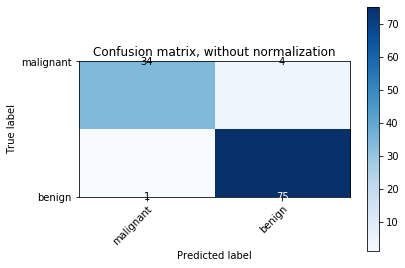

In [24]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)

y_score = gradient_boosting_classifier.predict_proba(X_test)

plot_confusion_matrix(y_test, y_pred, classes=data.target_names)

Average precision-recall score: 0.995


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.995')

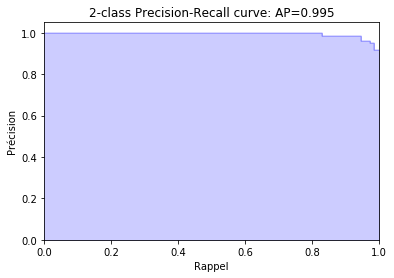

In [25]:
average_precision = average_precision_score(y_test, y_score[:, 1])

print('Average precision-recall score: {0:0.3f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_test, y_score[:, 1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.3f}'.format(average_precision))

## XGBoost

Une des bibliothèques les plus utilisées et les plus compétitives en matière de modèle ensembliste est XGBoost. Les modèles produits pas XGBoost utilisent des méthodes similaires au gradient boosting vu précedemment. La force de cette implémentation est sont optimisation aussi bien d'un point de vue mathématique qu'informatique. Bien que l'API de Sklearn permette de créer ce type de modèle, nous utiliseront ici la bibliothèque originale.

## Installation

Suivre les instructions sur https://xgboost.readthedocs.io/en/latest/build.html

ou

In [ ]:
conda install -c conda-forge xgboost

## Import de la bibliothèque

In [28]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
import warnings

np.random.seed(160716)

## Import du dataset

On utilise le dataset California Housing qui propose d'estimer le prix médian de l'immobilier des quartiers résidentiels californiens. Ce dataset est disponible via l'API sklearn.datasets.

In [29]:
data = fetch_california_housing()

## Preprocessing

### Conversion en DMatrice

Première spécificité de XGBoost en regard des autres méthodes abordées jusqu'à présent, le format des données en entrée. XGBoost n'accepte les données que sous un format qui lui est spécifique, une DMatrice, laquelle ne peut comporter que des entrées numériques.

*Remarque - Une implication directe est donc la nécessité de l'encoding des variables catégorielles.*

### Question 12:
Après avoir splité le dataset initial en _train_ et _test_ et en utilisant la fonction _DMatrix_ de la bibliothèque _XGBoost_ , convertir les données contenues dans _data_ en DMatrice.

In [30]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_xgb = xgb.DMatrix(X_train, y_train)
test_xgb = xgb.DMatrix(X_test, y_test)

## Entraînement d'un modèle

### XGBoost naïf

On commence par dériver un modèle sans aucun tuning d'hyperparamètres. Il constituera un socle comparatif pour tous les modèles déployés par la suite.

### Question 13:

Construire un regresseur XGBoost et l'entrainer avec les données d'entrainement. Utiliser ce modèle pour faire une prédiction et mesurer la MAE (Mean Absolute Error)

In [31]:
xgb_regressor_notuning = xgb.XGBRegressor()

xgb_regressor_notuning.fit(X_train, y_train)

[16:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
y_pred = xgb_regressor_notuning.predict(X_test)

In [33]:
mean_absolute_error(y_pred, y_test)

0.37252399598338803

### Question 14:

Construire la fonction fit_cv_xgb dont la signature est donnée ci dessous. Si useTrainCV est True, utiliser les résultats d'un entrainement par validation croisée pour déterminer le nombre optimal d'estimateurs.

In [39]:
def fit_cv_xgb(model, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_params = model.get_xgb_params()
        xgb_train = xgb.DMatrix(X_train, y_train)
        cv_result = xgb.cv(xgb_params, xgb_train, num_boost_round=model.get_params()['n_estimators'], nfold=cv_folds,
                           metrics='mae', early_stopping_rounds=early_stopping_rounds)
        model.set_params(n_estimators=cv_result.shape[0])
    
    #Fit the algorithm on the data
    model.fit(X_train, y_train, eval_metric='mae')
        
    #Predict training set:
    y_pred = model.predict(X_train)
        
    #Print model report:
    print("\nModel Report")
    print("Mean Absolute Error : %.4g" % mean_absolute_error(y_train, y_pred))

In [40]:
xgb_regressor = xgb.XGBRegressor(learning_rate=0.1,
                                 n_estimators=1500,
                                 max_depth=5,
                                 min_child_weight=1,
                                 gamma=0,
                                 subsample=0.8,
                                 colsample_bytree=0.8,
                                 objective='reg:squarederror',
                                 nthread=4,
                                 scale_pos_weight=1)
fit_cv_xgb(xgb_regressor, X_train, y_train)


Model Report
Mean Absolute Error : 0.1382


### Tuning des hyperparamètres

#### *n_estimators* à *learning_rate* fixé 

On se donne *learning_rate* = 0.1.

### Question 15:

Déterminer le nombre d'arbres (*n_estimators*) qui minimise l'erreur de validation croisée pour cette valeur.

#### *max_depth* et *min_child_weight*

### Question 16:

A l'aide d'un gridsearch, trouver les valeurs optimales pour hyperparamètres *max_depth* et *min_child_weight*.

On pourra utiliser la fonction *GridSearchCV* de *Scikit-Learn*.

In [41]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator=xgb.XGBRegressor(learning_rate =0.1, 
                                                   n_estimators=140, 
                                                   max_depth=5,
                                                   min_child_weight=1, 
                                                   gamma=0, 
                                                   subsample=0.8, 
                                                   colsample_bytree=0.8,
                                                   objective='reg:squarederror', 
                                                   nthread=4, 
                                                   scale_pos_weight=1), 
                        param_grid=param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch1.fit(X_train, y_train)

gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 3}, -0.29727965173220977)

In [42]:
param_test2 = {
 'max_depth':range(8,11),
 'min_child_weight':range(2,5)
}

gsearch2 = GridSearchCV(estimator=xgb.XGBRegressor(learning_rate =0.1, 
                                                   n_estimators=140, 
                                                   max_depth=5,
                                                   min_child_weight=1, 
                                                   gamma=0, 
                                                   subsample=0.8, 
                                                   colsample_bytree=0.8,
                                                   objective='reg:squarederror', 
                                                   nthread=4, 
                                                   scale_pos_weight=1), 
                        param_grid=param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch2.fit(X_train, y_train)

gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_child_weight': 3}, -0.29727965173220977)

Quelles sont les meilleures valeurs de *max_depth* et *min_child_weight* ?

### Question 17:

De manière analogue, trouver la meilleure valeur pour les hyperparametres suivants. Il est recommandé de suivre l'ordre des évaluations pour ne pas avoir d'entrainements trop longs.

*NB - Ne pas oublier d'imputer les valeurs optimales de* max_depth *et* min_child_weight. 

#### *gamma*

In [19]:
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator=xgb.XGBRegressor(learning_rate=0.1, 
                                                   n_estimators=140, 
                                                   max_depth=9,
                                                   min_child_weight=3, 
                                                   gamma=0, 
                                                   subsample=0.8, 
                                                   colsample_bytree=0.8,
                                                   objective='reg:squarederror', 
                                                   nthread=4, 
                                                   scale_pos_weight=1), 
                        param_grid=param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch3.fit(X_train, y_train)

gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.4}, -0.3350718829229446)

#### *subsample* et *colsample_bytree*

In [21]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator=xgb.XGBRegressor(learning_rate=0.1, 
                                                   n_estimators=140, 
                                                   max_depth=9,
                                                   min_child_weight=3, 
                                                   gamma=.4, 
                                                   subsample=0.8, 
                                                   colsample_bytree=0.8,
                                                   objective='reg:squarederror', 
                                                   nthread=4, 
                                                   scale_pos_weight=1), 
                        param_grid=param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch4.fit(X_train, y_train)

gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.9}, -0.2987767759198487)

#### Paramètre de régularisation

In [25]:
param_test5 = {
 'reg_alpha':[0, .5, 1, 5, 10, 50]
}

gsearch5 = GridSearchCV(estimator=xgb.XGBRegressor(learning_rate=0.1, 
                                                   n_estimators=140, 
                                                   max_depth=9,
                                                   min_child_weight=3, 
                                                   gamma=.4, 
                                                   subsample=.9, 
                                                   colsample_bytree=.7,
                                                   objective='reg:squarederror', 
                                                   nthread=4, 
                                                   scale_pos_weight=1), 
                        param_grid=param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,
                        iid=False, 
                        cv=5)

gsearch5.fit(X_train, y_train)

gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 0.5}, -0.2971849212554456)

In [10]:
xgb_final = xgb.XGBRegressor(learning_rate=0.01,
                             n_estimators=5000,
                             max_depth=9,
                             min_child_weight=3,
                             gamma=.4,
                             subsample=0.9,
                             colsample_bytree=0.7,
                             reg_alpha=.5,
                             objective= 'reg:squarederror',
                             nthread=4,
                             scale_pos_weight=1)
fit_cv_xgb(xgb_final, X_train, y_train)


Model Report
Mean Absolute Error : 0.151


## Comparaison de performances

### Question 18:

Comparer les MAE du modèle "naïf" et du modèle tuné.

Le modèle tuné obtient de bien meilleures performances que le modèle naïf.

## Bonus

On peut également utiliser des méthodes comme le gridsearch pour évaluer des modèles de nature différente. C'est comme si le type de modèle était un hyper-paramètre dans ce cas. Mettre en oeuvre un Gridsearch avec différents modèles ensemblistes (ou non). Attention, les hyper-paramètres ne sont généralement pas les même entre les modèles.